# COVID Global Clustering Scratchpad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


## Clustering thoughts
- Take case + death counts
- Trending pattern (?  what is a good single value metric.. rolling 3 day or some momentum value?)
- Adding population data
- Population density ?
- Median age and age distributions

Attempt to cluster the countries ?


In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,Cabo Verde,Mauritania,Western Sahara,Bhutan,Burundi,South Sudan,Sao Tome and Principe,Timor-Leste,Papua New Guinea,Yemen
2020-04-08,429052,148220,139422,113959,113296,61474,82809,64586,38226,23403,...,7,6,4,5,3,2,4,1,2,0
2020-04-09,461437,153222,143626,118781,118181,65872,82883,66220,42282,24983,...,7,7,4,5,3,3,4,1,2,0
2020-04-10,496535,158273,147577,125931,122171,74605,82941,68192,47029,26667,...,7,7,4,5,3,4,4,2,2,1
2020-04-11,526396,163027,152271,130727,124908,79874,83014,70029,52167,28018,...,8,7,4,5,5,4,4,2,2,1
2020-04-12,555313,166831,156363,133670,127854,85206,83134,71686,56956,29647,...,8,7,6,5,5,4,4,2,2,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,Cabo Verde,Mauritania,Western Sahara,Bhutan,Burundi,South Sudan,Sao Tome and Principe,Timor-Leste,Papua New Guinea,Yemen
2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,32385.0,5002.0,4204.0,4822.0,4885.0,4398.0,74.0,1634.0,4056.0,1580.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-04-10,35098.0,5051.0,3951.0,7150.0,3990.0,8733.0,58.0,1972.0,4747.0,1684.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2020-04-11,29861.0,4754.0,4694.0,4796.0,2737.0,5269.0,73.0,1837.0,5138.0,1351.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-04-12,28917.0,3804.0,4092.0,2943.0,2946.0,5332.0,120.0,1657.0,4789.0,1629.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Iran,Belgium,China,Germany,Netherlands,...,South Sudan,Laos,Eswatini,Eritrea,Guinea,Guinea-Bissau,Equatorial Guinea,Dominica,Holy See,Namibia
2020-04-08,14695,17669,14792,10887,7111,3993,2240,3337,2349,2255,...,0,0,0,0,0,0,0,0,0,0
2020-04-09,16478,18279,15447,12228,7993,4110,2523,3339,2607,2403,...,0,0,0,0,0,0,0,0,0,0
2020-04-10,18586,18849,16081,13215,8974,4232,3019,3340,2767,2520,...,0,0,0,0,0,0,0,0,0,0
2020-04-11,20463,19468,16606,13851,9892,4357,3346,3343,2736,2653,...,0,0,0,0,0,0,0,0,0,0
2020-04-12,22020,19899,17209,14412,10629,4474,3600,3343,3022,2747,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Iran,Belgium,China,Germany,Netherlands,...,South Sudan,Laos,Eswatini,Eritrea,Guinea,Guinea-Bissau,Equatorial Guinea,Dominica,Holy See,Namibia
2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,1783.0,610.0,655.0,1341.0,882.0,117.0,283.0,2.0,258.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-10,2108.0,570.0,634.0,987.0,981.0,122.0,496.0,1.0,160.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-11,1877.0,619.0,525.0,636.0,918.0,125.0,327.0,3.0,-31.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-12,1557.0,431.0,603.0,561.0,737.0,117.0,254.0,0.0,286.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Global Population Comparisons

In [287]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.sort_values(by=['Value'], ascending=False).head(), dfc_g.tail(1).transpose().count())  #262 countries / n countries
df_gmerged = pd.merge(left=dfc_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gpop_2016, on='Country/Region').rename(columns={'Value':'Population'})
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Cases" })

display(df_gmerged.rename(columns={'US':'United States'}).sort_values(by=['Population'], ascending=False).head())

df_gmerged = pd.merge(left=dfd_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gmerged, on='Country/Region')
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Deaths" })
       
display(df_gmerged.sort_values(by=['Population'], ascending=False).head(), df_gmerged.tail(1).transpose().count())



,Country/Region,Country Code,Year,Value
2621,World,WLD,2016,7.442136e+09
968,IDA & IBRD total,IBT,2016,6.271593e+09
1481,Low & middle income,LMY,2016,6.252106e+09
1823,Middle income,MIC,2016,5.592833e+09
911,IBRD only,IBD,2016,4.697247e+09


2020-04-12    185
dtype: int64

,Country/Region,Cases,Country Code,Year,Population
6,China,83134,CHN,2016,1.378665e+09
18,India,9205,IND,2016,1.324171e+09
0,United States,555313,USA,2016,3.231275e+08
32,Indonesia,4241,IDN,2016,2.611155e+08
12,Brazil,22192,BRA,2016,2.076529e+08


,Country/Region,Deaths,Cases,Country Code,Year,Population
6,China,3343,83134,CHN,2016,1.378665e+09
19,India,331,9205,IND,2016,1.324171e+09
0,United States,22020,555313,USA,2016,3.231275e+08
15,Indonesia,373,4241,IDN,2016,2.611155e+08
9,Brazil,1223,22192,BRA,2016,2.076529e+08


156    6
dtype: int64

## Add Population Density from worldbank

In [288]:
# population density source
# http://api.worldbank.org/v2/en/indicator/EN.POP.DNST?downloadformat=csv   
from zipfile import ZipFile
import requests, zipfile, io
import urllib.request

def get_zip(url):
    urllib.request.urlretrieve(url, "GDP.zip")
    compressed_file = zipfile.ZipFile('GDP.zip')
    files = compressed_file.namelist()
    for f in files:
        if (f.find('API') == 0):
            csv_file = compressed_file.open(f)  # pattern match how?
            return pd.read_csv(csv_file, header=2)
    return None

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def add_metric(indicator, colname, dfm, year='2019', debug=True):
    dfnew = get_zip('http://api.worldbank.org/v2/en/indicator/'+indicator+'?downloadformat=csv')
    dfnew = dfnew.fillna(method='ffill', axis=1)[['Country Code', year]].rename(columns={year:colname})

    dfm = pd.merge(left=dfm , right=dfnew, on ='Country Code') 
    display(dfm[dfm['Country/Region'].isin(['Dominica','Japan'])].head()) if debug else None

    dfm[colname] = dfm[colname].astype(str).apply(lambda x: float(x) if isfloat(x) else 0.0).round(2)
    return dfm


## Add demographics from worldbank

In [293]:
#  -- all available https://data.worldbank.org/indicator
#  API docs https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures
#
#   Examples:
# unemployment data http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# hospital beds http://api.worldbank.org/v2/en/indicator/SH.MED.BEDS.ZS?downloadformat=csv
# air flights http://api.worldbank.org/v2/en/indicator/IS.AIR.DPRT?downloadformat=csv
# rail lines http://api.worldbank.org/v2/en/indicator/IS.RRS.TOTL.KM?downloadformat=csv
# employment F http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.FE.ZS?downloadformat=csv
# employment M http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.MA.ZS?downloadformat=csv
# unemployment http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# urban pop% http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL.IN.ZS?downloadformat=csv
# pollution EN.ATM.PM25.MC.M3
# slum% indicator/ EN.POP.SLUM.UR.ZS

df_gmerged3 = df_gmerged.copy()  # df_gmerged2 no longer needed

df_gmerged3 = add_metric('IS.AIR.DPRT', 'flights', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.ATM.PM25.MC.M3', 'pollution', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SL.UEM.TOTL.ZS', 'unemp%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.MED.BEDS.ZS', 'hospbeds', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('IS.RRS.TOTL.KM', 'railways', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.URB.TOTL.IN.ZS', 'urbanpop%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.POP.SLUM.UR.ZS', 'slum%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.POP.DNST', 'popdensity%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('NY.GDP.PCAP.PP.CD', 'GDP/cap', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SE.ADT.LITR.ZS', 'literacy', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('FR.INR.DPST', 'deposit rate', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.DTH.COMM.ZS', 'COD disease', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.IMM.IDPT', 'DTP immunized', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.POP.65UP.TO.ZS', 'pop% >= 65', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('TG.VAL.TOTL.GD.ZS', 'trade%', df_gmerged3, year='2019', debug=False)


df_gmerged3 = df_gmerged3.sort_values(by='urbanpop%', ascending=False).drop(columns=['Year'])

display(df_gmerged3.shape, pd.concat([df_gmerged3.head(5), df_gmerged3[df_gmerged3['Country/Region'].isin(['Japan','United States','Dominica'])]], axis=0))


(157, 20)

,Country/Region,Deaths,Cases,Country Code,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
79,Singapore,8,2532,SGP,5607283.0,208787.0,19.08,4.11,2.4,0.0,100.00,0.0,7953.00,101531.63,97.34,0.16,22.7,96.0,11.46,215.09
129,Monaco,1,93,MCO,38499.0,3.0,0.00,0.00,13.8,0.0,100.00,0.0,19196.00,0.00,0.00,0.00,0.0,99.0,0.00,0.00
125,Kuwait,1,1234,KWT,4052584.0,46450.0,60.75,2.18,2.0,0.0,100.00,0.0,232.17,72897.56,96.06,1.67,14.8,99.0,2.55,76.92
85,Qatar,7,2979,QAT,2569804.0,197811.0,91.19,0.09,1.2,0.0,99.14,0.0,239.59,126898.43,93.46,3.45,5.2,98.0,1.37,63.11
5,Belgium,3600,29647,BEL,11348159.0,140674.0,12.89,5.59,6.2,3605.0,98.00,0.0,377.21,51408.00,0.00,0.00,7.9,98.0,18.79,168.92
31,Japan,108,6748,JPN,126994511.0,999594.0,11.70,2.29,13.4,16851.7,91.62,0.0,347.07,42797.46,0.00,0.32,12.7,99.0,27.58,29.91
0,United States,22020,555313,USA,323127513.0,9879630.0,7.41,3.68,2.9,150462.3,82.26,0.0,35.77,62794.59,0.00,0.00,5.2,94.0,15.81,20.83
155,Dominica,0,16,DMA,73543.0,0.0,19.49,0.00,3.8,0.0,70.48,16.6,95.50,11129.86,0.00,1.63,0.0,94.0,0.00,52.46


In [294]:
# df_gmerged3
df_gmerged4 = df_gmerged3.copy()
df_gmerged4


,Country/Region,Deaths,Cases,Country Code,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
79,Singapore,8,2532,SGP,5607283.0,208787.00,19.08,4.11,2.40,0.0,100.00,0.0,7953.00,101531.63,97.34,0.16,22.7,96.0,11.46,215.09
129,Monaco,1,93,MCO,38499.0,3.00,0.00,0.00,13.80,0.0,100.00,0.0,19196.00,0.00,0.00,0.00,0.0,99.0,0.00,0.00
125,Kuwait,1,1234,KWT,4052584.0,46450.00,60.75,2.18,2.00,0.0,100.00,0.0,232.17,72897.56,96.06,1.67,14.8,99.0,2.55,76.92
85,Qatar,7,2979,QAT,2569804.0,197811.00,91.19,0.09,1.20,0.0,99.14,0.0,239.59,126898.43,93.46,3.45,5.2,98.0,1.37,63.11
5,Belgium,3600,29647,BEL,11348159.0,140674.00,12.89,5.59,6.20,3605.0,98.00,0.0,377.21,51408.00,0.00,0.00,7.9,98.0,18.79,168.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Niger,12,529,NER,20672987.0,471.00,94.05,0.47,0.30,0.0,16.42,70.1,17.72,1063.42,30.56,6.49,62.7,79.0,2.60,41.09
127,Liechtenstein,1,79,LIE,37666.0,0.00,0.00,0.00,0.00,0.0,14.34,0.0,236.94,0.00,0.00,0.00,0.0,0.0,0.00,0.00
135,Papua New Guinea,0,2,PNG,8084991.0,41545.17,12.29,2.46,4.02,0.0,13.17,0.0,19.00,4336.24,61.60,0.52,36.1,61.0,3.45,52.60
134,Burundi,0,5,BDI,10524117.0,1400.00,38.90,1.43,0.80,0.0,13.03,57.9,435.18,744.18,68.38,0.00,55.8,90.0,2.25,32.01


,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Deaths,1.000000,0.862971,0.162647,0.597494,-0.156757,0.048853,0.093338,0.600457,0.177277,-0.184462,-0.025761,0.241889,-0.167517,-0.124968,-0.165453,0.094101,0.328842,-0.066380
Cases,0.862971,1.000000,0.237281,0.866710,-0.134682,-0.002493,0.092972,0.818124,0.166605,-0.168865,-0.026606,0.251385,-0.204180,-0.101293,-0.158274,0.088486,0.269460,-0.087285
Population,0.162647,0.237281,1.000000,0.503683,0.266918,-0.043419,-0.036681,0.612328,-0.064134,0.009102,-0.017852,-0.044078,0.027091,-0.026788,-0.016906,0.030978,0.010717,-0.139232
flights,0.597494,0.866710,0.503683,1.000000,-0.056448,-0.065097,0.058281,0.910862,0.139704,-0.140147,-0.025340,0.222006,-0.181047,-0.089700,-0.147579,0.090515,0.182559,-0.099238
pollution,-0.156757,-0.134682,0.266918,-0.056448,1.000000,0.044126,-0.387628,-0.034217,-0.237375,0.480713,-0.101503,-0.173696,0.134380,0.112123,0.426766,-0.111221,-0.471731,-0.101546
unemp%,0.048853,-0.002493,-0.043419,-0.065097,0.044126,1.000000,-0.004988,-0.002069,0.157432,0.034485,-0.125162,-0.142700,0.227590,0.140728,-0.007397,-0.109850,0.068436,-0.053903
hospbeds,0.093338,0.092972,-0.036681,0.058281,-0.387628,-0.004988,1.000000,0.139725,0.389224,-0.564192,0.333199,0.306675,-0.012333,-0.162804,-0.512664,0.295760,0.599734,0.220171
railways,0.600457,0.818124,0.612328,0.910862,-0.034217,-0.002069,0.139725,1.000000,0.140813,-0.174046,-0.043233,0.181051,-0.166043,-0.070044,-0.162904,0.079451,0.252575,-0.126048
urbanpop%,0.177277,0.166605,-0.064134,0.139704,-0.237375,0.157432,0.389224,0.140813,1.000000,-0.481698,0.181691,0.607247,-0.017164,-0.110942,-0.527651,0.339692,0.406418,0.190955
slum%,-0.184462,-0.168865,0.009102,-0.140147,0.480713,0.034485,-0.564192,-0.174046,-0.481698,1.000000,-0.114640,-0.554420,-0.075529,0.288356,0.802550,-0.276399,-0.603779,-0.238339


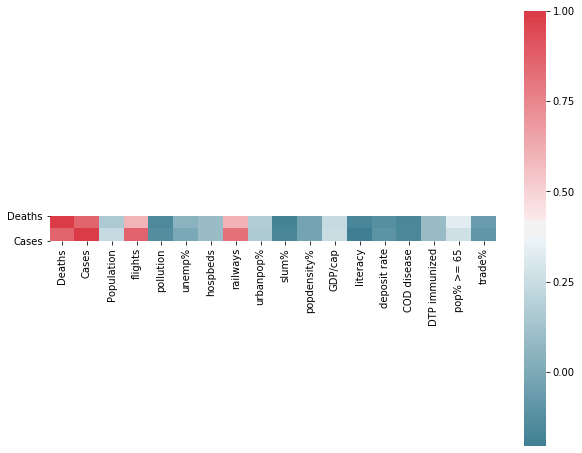

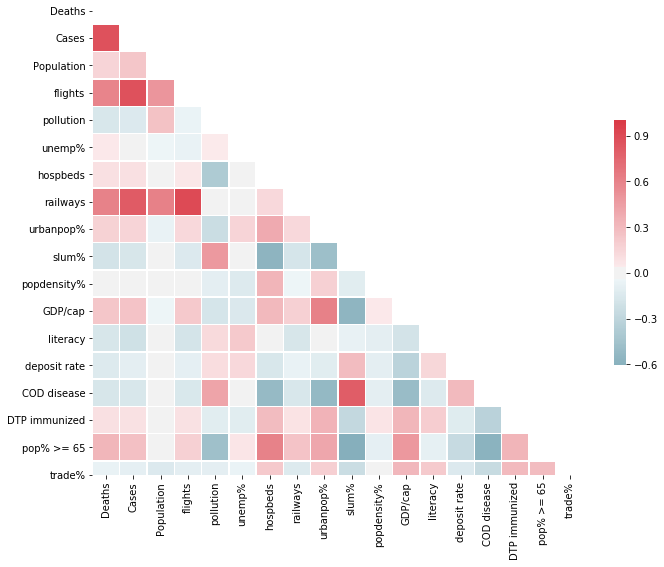

In [319]:
import seaborn as sns

df_corr = df_gmerged4.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr.iloc[0:2,:], mask=np.zeros_like(df_corr.iloc[0:2,:], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df_corr


# Pop Density vs Case counts

In [ ]:
max_ctys = 30
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged2[df_gmerged2['Cases'] > 1000].sort_values(by=['popdensity'],ascending=False).head(max_ctys)

ax1.set_xlabel('Cases')  
ax1.set_xscale('linear')
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Cases'], color='xkcd:green')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,'density: '+str(df_gmerged_h['popdensity'].iloc[n:n+1].round(2).item()) + ', pop: '+str(df_gmerged_h['Population'].iloc[n:n+1].div(1000000).round(0).item()) +'M, '+str(df_gmerged_h['% of pop'].iloc[n:n+1].round(2).item())  +'%', color='xkcd:blue')

# ax2 = ax1.twiny()
# ax2.set_xscale('linear')
# ax2.set(xlim=[0, 10])   # get max min +/- buffer
# ax2.set_xlabel('Population density', color='xkcd:red')  
# ax2.spines['top'].set_color('red')
# ax2.tick_params(axis='x', colors='red')
# ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['popdensity'], color='xkcd:red')
# for n,i in enumerate(ax2.patches):
#     ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['popdensity'].iloc[n:n+1].item()), color='xkcd:red')

plt.title('Top Population Density Countries > 1000 cases')
plt.gca().invert_yaxis()
plt.show()

In [296]:
# read from JSON directly WIP -- would be more optimal than above but scrap for now
# EN.ATM.PM25.MC.M3 - polution
# able to aggrecate and get last value, not sure what source= is    ?source=2&format=json&mrnev=1&per_page=500
#   http://api.worldbank.org/v2/country/all/indicator/EN.ATM.PM25.MC.M3;SH.MED.BEDS.ZS;IS.AIR.DPRT;IS.RRS.TOTL.KM;SP.URB.TOTL.IN.ZS;SP.POP.TOTL;SL.UEM.TOTL.ZS?source=2&format=json&mrnev=1&per_page=5000
#jurl = 'http://api.worldbank.org/v2/country/all/indicator/EN.ATM.PM25.MC.M3;SH.MED.BEDS.ZS;IS.AIR.DPRT;IS.RRS.TOTL.KM;SP.URB.TOTL.IN.ZS;SP.POP.TOTL;SL.UEM.TOTL.ZS?source=2&format=json&mrnev=1&per_page=5000'
    
#r = requests.get(jurl)
#display(r.text)
#    
#pd.read_json(r.text)

